In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPool2D, Dense
from keras.layers import Flatten, Dropout
from keras.utils import to_categorical

/Users/michal/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/fer2013/fer2013.csv')
df.sample(5)

,emotion,pixels,Usage
9686,6,194 201 207 204 203 201 198 195 192 187 182 18...,Training
24647,5,36 29 33 32 37 36 40 37 35 31 22 22 22 17 17 2...,Training
6701,0,128 64 107 191 188 160 131 101 58 49 70 83 88 ...,Training
25096,3,111 170 185 184 188 192 192 196 203 204 205 21...,Training
33639,6,157 165 117 44 51 79 112 123 130 134 140 149 1...,PrivateTest


In [3]:
def error_rate(pred, target):
    return np.mean(pred!=target)

In [4]:
def classification_rate(p, t):
    return np.mean(p == t)

In [5]:
def ohe(labels):
    ohe_lab = np.zeros((labels.shape[0], len(set(labels))))
    for i in range(len(labels)):
        ohe_lab[i, labels[i]] = 1
    return ohe_lab     

In [6]:
def rearrange(X):
    return (X.transpose(0, 2, 3, 1) / 255).astype(np.float32)

In [7]:
Y_all = df['emotion'].astype(int)
X_all = []
for i in df['pixels']:
    X_all.append([int(p) for p in i.split()]) #acts like getData()
X_all, Y_all = np.array(X_all), np.array(Y_all)
X_all = np.reshape(X_all, (X_all.shape[0], 1, 48, 48)) #acts like getImageData()

In [8]:
from collections import Counter
Counter(Y_all)

Counter({0: 4953, 1: 547, 2: 5121, 3: 8989, 4: 6077, 5: 4002, 6: 6198})

In [9]:
X = rearrange(X_all)
Y = to_categorical(Y_all)

In [10]:
print(X.shape)
print(type(X))
print(Y.shape)
print(type(Y))

(35887, 48, 48, 1)
<class 'numpy.ndarray'>
(35887, 7)
<class 'numpy.ndarray'>


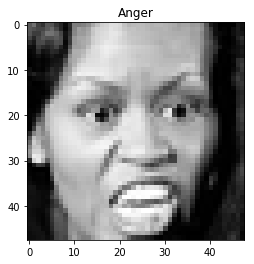

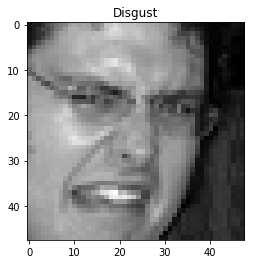

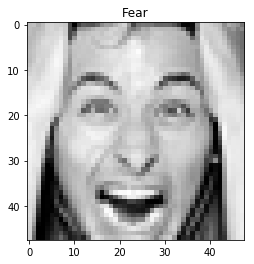

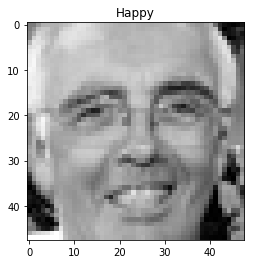

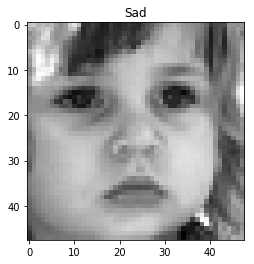

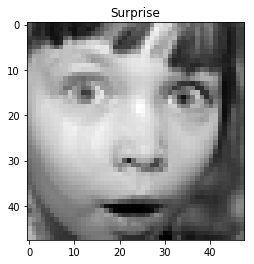

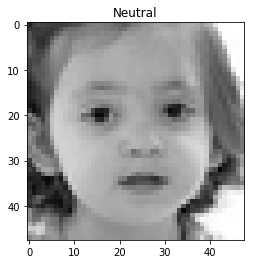

In [11]:
# show one of each emtion randomly
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

for i in range(7):
    x, y = X_all[Y_all==i], Y_all[Y_all==i]
    N = len(y)
    j = np.random.choice(N)
    plt.imshow(x[j].reshape(48,48), cmap='gray')
    plt.title(label_map[y[j]])
    plt.show()

In [12]:
input_shape = X.shape[1:]
num_classes = 7

In [13]:
X_train = X[:-1000]
Y_train = Y[:-1000]
X_test = X[-1000:]
Y_test = Y[-1000:]

In [14]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 padding='same', use_bias=True, input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 padding='same', use_bias=True))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', 
                 padding='same', use_bias=True))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

rms = keras.optimizers.RMSprop(lr=1e-5, rho=0.99)
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [15]:
history = model.fit(X_train, Y_train,
                   batch_size = 256,
                   epochs = 50,
                   verbose = 1,
                   validation_data=(X_test, Y_test))

Train on 34887 samples, validate on 1000 samples
Epoch 1/50
34887/34887 [==============================] - 114s 3ms/step - loss: 1.8414 - acc: 0.2496 - val_loss: 1.8290 - val_acc: 0.2200
Epoch 2/50
34887/34887 [==============================] - 113s 3ms/step - loss: 1.8099 - acc: 0.2514 - val_loss: 1.8225 - val_acc: 0.2200
Epoch 3/50
34887/34887 [==============================] - 114s 3ms/step - loss: 1.8040 - acc: 0.2514 - val_loss: 1.8139 - val_acc: 0.2200
Epoch 4/50
34887/34887 [==============================] - 115s 3ms/step - loss: 1.7982 - acc: 0.2514 - val_loss: 1.8107 - val_acc: 0.2200
Epoch 5/50
34887/34887 [==============================] - 114s 3ms/step - loss: 1.7919 - acc: 0.2517 - val_loss: 1.8021 - val_acc: 0.2220
Epoch 6/50
34887/34887 [==============================] - 116s 3ms/step - loss: 1.7846 - acc: 0.2529 - val_loss: 1.7965 - val_acc: 0.2200
Epoch 7/50
34887/34887 [==============================] - 114s 3ms/step - loss: 1.7758 - acc: 0.2576 - val_loss: 1.7883 - v

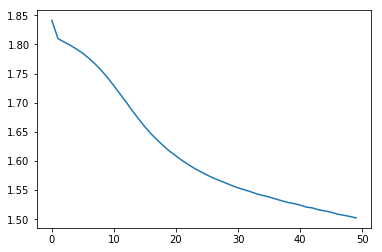

In [16]:
plt.plot(history.history['loss'])
plt.show()

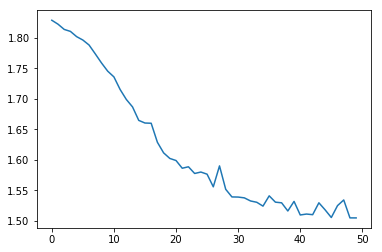

In [17]:
plt.plot(history.history['val_loss'])
plt.show()

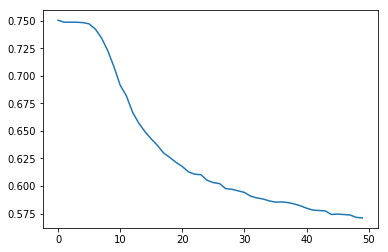

In [18]:
plt.plot(np.ones(len(history.history['acc']))-history.history['acc'])
plt.show()

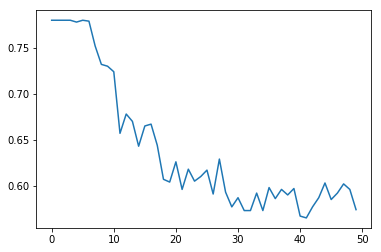

In [19]:
plt.plot(np.ones(len(history.history['val_acc']))-history.history['val_acc'])
plt.show()